### aim: 

### date: 

In [78]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [79]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [80]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 13})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 13}
plt.rcParams['text.usetex'] = True
plt.rc('font', **font)

In [81]:
# mm_rg = xr.open_dataset('/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/wspdComponents/PlankTOMmask_krg.nc')
# savenam = '/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/wspdComponents/PlankTOMmask_regridrecalc.nc'
# mm_rg = xr.open_dataset(savenam)
# tmask = mm_rg.tmask

mm_med = xr.open_dataset('/gpfs/data/greenocean/software/resources/MEDUSA/mesh_mask_eORCA1_wrk.nc')
mm_med['area'] = mm_med.tmask[0,:,:] * mm_med.e1t[:,:] * mm_med.e2t[:,:]

mm_tom = xr.open_dataset('/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc')
mm_tom['area'] = mm_tom.tmask[0,0,:,:] * mm_tom.e1t[0,:,:] * mm_tom.e2t[0,:,:]

print(np.nansum(mm_tom.area.values))
print(np.nansum(mm_med.area.values))
#print(np.nansum(mm_med.area[0:114,:].values))
# print(np.nansum(mm_rg.tmask[:,:].values))

print('ukesm lats')
print(mm_med['nav_lat'][0:114,0])
print('tom lats')
print(mm_tom['nav_lat'][0:37,0])

360890792804973.06
365514208750225.2
ukesm lats
<xarray.DataArray 'nav_lat' (y: 114)>
array([-84.21071 , -84.108955, -84.005424, -83.90008 , -83.79289 , -83.68382 ,
       -83.572845, -83.45993 , -83.34504 , -83.22814 , -83.1092  , -82.988174,
       -82.865036, -82.739746, -82.612274, -82.48257 , -82.3506  , -82.21633 ,
       -82.07972 , -81.94073 , -81.79932 , -81.65543 , -81.50905 , -81.360115,
       -81.20859 , -81.05442 , -80.89758 , -80.73801 , -80.57567 , -80.4105  ,
       -80.24247 , -80.071526, -79.89762 , -79.720695, -79.54071 , -79.357605,
       -79.17133 , -78.98184 , -78.78908 , -78.59298 , -78.3935  , -78.19058 ,
       -77.98417 , -77.7742  , -77.56062 , -77.34337 , -77.12238 , -76.89761 ,
       -76.66898 , -76.43644 , -76.19991 , -75.95934 , -75.71467 , -75.46582 ,
       -75.21273 , -74.95534 , -74.693565, -74.42735 , -74.156624, -73.88131 ,
       -73.60134 , -73.31665 , -73.02715 , -72.73279 , -72.43347 , -72.129135,
       -71.8197  , -71.5051  , -71.185234, -7

In [82]:
ex = False

# mld

In [83]:

if ex:
    scens = ['1A','1B']

    yr = 1950; yre = 2099

    for s in scens:
        
        times = pd.date_range(f"{yr}/01/01",f"{yre+1}/01/01",freq='MS',closed='left')
        print(len(times))
        savenam = f'./data/FG_somxl010_ukesm_{s}.nc'
        ind = 0
        vals = np.zeros(len(times))
        for y in range(yr,yre+1):
            if (y%30 == 0):
                print(y)
            


            tdir = '/gpfs/data/greenocean/software/resources/MEDUSA/ukesm_allscen_gridT_mld/'
            w = xr.open_dataset(f'{tdir}/nemo_scen_{s}_1m_{y}_fy_grid-T.nc')
            tmld = w.weighted(mm_med['area']).mean(dim = ['x','y'])
            vals[ind:ind+12] = tmld.somxl010.values
            ind = ind+12


        data_vars = {'somxl010':(['time_counter'], vals,
        {'units': 'm',
        'long_name':'mld by 010 crit'}),
        }
        # define coordinates
        coords = {'time_counter': (['time_counter'], times),
                }
        # define global attributes
        attrs = {'made in':'SOZONE/windAnalyis/CELOSplot/template.ipynb',
        'desc': ''
        }
        ds = xr.Dataset(data_vars=data_vars,
        coords=coords,
        attrs=attrs)
        ds.to_netcdf(savenam)
        plt.plot(ds.time_counter, ds.somxl010)

In [84]:

if ex:
    scens = ['1A','1B']

    yr = 1950; yre = 2099

    for s in range(0,2):
        print(scens[s])
        times = pd.date_range(f"{yr}/01/01",f"{yre+1}/01/01",freq='MS',closed='left')
        print(len(times))
        savenam = f'./data/FG_somxl010_tom_{scens[s]}A7.nc'
        ind = 0
        vals = np.zeros(len(times))
        for y in range(yr,yre+1):
            if (y%30 == 0):
                print(y)
            tdir = f'/gpfs/data/greenocean/software/runs/TOM12_TJ_{scens[s]}A7/'
            w = xr.open_dataset(f'{tdir}ORCA2_1m_{y}0101_{y}1231_grid_T.nc')
            tmld = w.mldr10_1.weighted(mm_tom['area']).mean(dim = ['x','y'])
            vals[ind:ind+12] = tmld.values
            ind = ind+12


        data_vars = {'somxl010':(['time_counter'], vals,
        {'units': 'm',
        'long_name':'mld by 010 crit'}),
        }
        # define coordinates
        coords = {'time_counter': (['time_counter'], times),
                }
        # define global attributes
        attrs = {'made in':'windAnalyis/CELOSplot/template.ipynb',
        'desc': ''
        }
        ds = xr.Dataset(data_vars=data_vars,
        coords=coords,
        attrs=attrs)
        ds.to_netcdf(savenam)
        plt.plot(ds.time_counter, ds.somxl010)

In [85]:

if ex:
    scens = ['1A','1B']

    yr = 1950; yre = 2023

    for s in range(0,1):
        print(scens[s])
        times = pd.date_range(f"{yr}/01/01",f"{yre+1}/01/01",freq='MS',closed='left')
        print(len(times))
        savenam = f'./data/FG_somxl010_tom_R4A0.nc'
        ind = 0
        vals = np.zeros(len(times))
        for y in range(yr,yre+1):
            if (y%30 == 0):
                print(y)
            tdir = f'/gpfs/data/greenocean/software/runs/TOM12_TJ_R4A0/'
            w = xr.open_dataset(f'{tdir}ORCA2_1m_{y}0101_{y}1231_grid_T.nc')
            tmld = w.mldr10_1.weighted(mm_tom['area']).mean(dim = ['x','y'])
            vals[ind:ind+12] = tmld.values
            ind = ind+12


        data_vars = {'somxl010':(['time_counter'], vals,
        {'units': 'm',
        'long_name':'mld by 010 crit'}),
        }
        # define coordinates
        coords = {'time_counter': (['time_counter'], times),
                }
        # define global attributes
        attrs = {'made in':'windAnalyis/CELOSplot/template.ipynb',
        'desc': ''
        }
        ds = xr.Dataset(data_vars=data_vars,
        coords=coords,
        attrs=attrs)
        ds.to_netcdf(savenam)
        plt.plot(ds.time_counter, ds.somxl010)

# temp

In [86]:

if ex:
    scens = ['1A','1B']

    yr = 1950; yre = 2099

    for s in scens:
        
        times = pd.date_range(f"{yr}/01/01",f"{yre+1}/01/01",freq='MS',closed='left')
        print(len(times))
        savenam = f'./data/FG_thetao_ukesm_{s}.nc'
        ind = 0
        vals = np.zeros(len(times))
        for y in range(yr,yre+1):
            if (y%30 == 0):
                print(y)
            


            tdir = '/gpfs/data/greenocean/software/resources/MEDUSA/ukesm_allscen_gridT_TS'
            w = xr.open_dataset(f'{tdir}/nemo_scen_{s}_1m_{y}_fy_grid-T.nc')
            tmld = w.isel(deptht = 0).weighted(mm_med['area']).mean(dim = ['x','y'])
            vals[ind:ind+12] = tmld.thetao.values
            ind = ind+12


        data_vars = {'thetao':(['time_counter'], vals,
        {'units': 'deg c',
        'long_name':''}),
        }
        # define coordinates
        coords = {'time_counter': (['time_counter'], times),
                }
        # define global attributes
        attrs = {'made in':'SOZONE/windAnalyis/CELOSplot/template.ipynb',
        'desc': ''
        }
        ds = xr.Dataset(data_vars=data_vars,
        coords=coords,
        attrs=attrs)
        ds.to_netcdf(savenam)
        plt.plot(ds.time_counter, ds.thetao)

In [87]:

if ex:
    scens = ['1B']

    yr = 1950; yre = 2099

    for s in range(0,2):
        print(scens[s])
        times = pd.date_range(f"{yr}/01/01",f"{yre+1}/01/01",freq='MS',closed='left')
        print(len(times))
        savenam = f'./data/FG_thetao_tom_{scens[s]}A7.nc'
        ind = 0
        vals = np.zeros(len(times))
        for y in range(yr,yre+1):
            if (y%30 == 0):
                print(y)
            tdir = f'/gpfs/data/greenocean/software/runs/TOM12_TJ_{scens[s]}A7/'
            w = xr.open_dataset(f'{tdir}ORCA2_1m_{y}0101_{y}1231_grid_T.nc')
            tmld = w.votemper.isel(deptht = 0).weighted(mm_tom['area']).mean(dim = ['x','y'])
            vals[ind:ind+12] = tmld.values
            ind = ind+12


        data_vars = {'thetao':(['time_counter'], vals,
        {'units': 'deg C',
        'long_name':'deg C'}),
        }
        # define coordinates
        coords = {'time_counter': (['time_counter'], times),
                }
        # define global attributes
        attrs = {'made in':'windAnalyis/CELOSplot/template.ipynb',
        'desc': ''
        }
        ds = xr.Dataset(data_vars=data_vars,
        coords=coords,
        attrs=attrs)
        ds.to_netcdf(savenam)
        plt.plot(ds.time_counter, ds.thetao)

In [88]:

if ex:
    scens = ['1B']

    yr = 1950; yre = 2023

    for s in range(0,2):
        print(scens[s])
        times = pd.date_range(f"{yr}/01/01",f"{yre+1}/01/01",freq='MS',closed='left')
        print(len(times))
        savenam = f'./data/FG_thetao_tom_R4A0.nc'
        ind = 0
        vals = np.zeros(len(times))
        for y in range(yr,yre+1):
            if (y%30 == 0):
                print(y)
            tdir = f'/gpfs/data/greenocean/software/runs/TOM12_TJ_R4A0/'
            w = xr.open_dataset(f'{tdir}ORCA2_1m_{y}0101_{y}1231_grid_T.nc')
            tmld = w.votemper.isel(deptht = 0).weighted(mm_tom['area']).mean(dim = ['x','y'])
            vals[ind:ind+12] = tmld.values
            ind = ind+12


        data_vars = {'thetao':(['time_counter'], vals,
        {'units': 'deg C',
        'long_name':'deg C'}),
        }
        # define coordinates
        coords = {'time_counter': (['time_counter'], times),
                }
        # define global attributes
        attrs = {'made in':'windAnalyis/CELOSplot/template.ipynb',
        'desc': ''
        }
        ds = xr.Dataset(data_vars=data_vars,
        coords=coords,
        attrs=attrs)
        ds.to_netcdf(savenam)
        plt.plot(ds.time_counter, ds.thetao)

# cflx

In [89]:
extract = False
if extract:
    scendict = {
        # Baynes Sound
        '1A': {
            'hist_str': 'bc370',
            'fut_str': 'be682',
            'name': 'HIST.OZONE \n LOW TEMP.',
            'name2':'1A: NatlOzone-SSP126',
            'color':'#E8D215',
            'color2':'orange'},
        '1B': {
            'hist_str': 'bc370',
            'fut_str': 'ce417',
            'name': 'HIST. OZONE \n HIGH TEMP.',
            'name2':'1B: NatlOzone-SSP370',
            'color':'#87800A',
            'color2':'orangered'},
        '2A': {
            'hist_str': 'cj198',
            'fut_str': 'cj880',
            'name': 'FIXED OZONE \n LOW TEMP.',
            'name2':'2A: Ozone1950-SSP126',
            'color':'#2DC18E',
            'color2':'mediumseagreen'},
        '2B': {
            'hist_str': 'cj198',
            'fut_str': 'cj881',
            'name': 'FIXED OZONE \n HIGH TEMP.',
            'name2':'2B: Ozone1950-SSP370',
            'color':'#18765C',
            'color2':'green'},
        '3A': {
            'hist_str': 'cj200',
            'fut_str': 'cj484',
            'name': '1990 OZONE \n LOW TEMP.',
            'name2':'3A: Ozone1990-SSP126',
            'color':'#FF462B',
            'color2':'dodgerblue'},
        '3B': {
            'hist_str': 'cj200',
            'fut_str': 'cj504',
            'name': '1990 OZONE \n HIGH TEMP.',
            'name2':'3B: Ozone1990-SSP370',
            'color':'#822722',
            'color2':'mediumblue'}
    }

    def make_yearlist_ukesm(yrst, yren, tscen, dtype = 'grid-T'):
        print(f'SCENARIO {tscen}')
        dslist = []

        for y in range(yrst,yren):
            if ((y<1990) & ((tscen == '3A') | (tscen == '3B'))):
                tstr = scendict['1A']['hist_str']
            elif y<2015:
                tstr = scendict[tscen]['hist_str']

            else:
                tstr = scendict[tscen]['fut_str']

            try:
                td = glob.glob(f'/gpfs/data/greenocean/software/resources/MEDUSA/PROC2/*{tstr}*{y}*{dtype}*')
                dslist.append(td[0])
            except:
                pass
                print(f'FAIL {tscen},{tstr}, {y}')
        return dslist


    ### 
    ukmesh = xr.open_dataset('/gpfs/data/greenocean/software/resources/MEDUSA/mesh_mask_eORCA1_wrk.nc')
    ukmesh['area'] = ukmesh.tmask[0,:,:] * ukmesh.e1t[:,:] * ukmesh.e2t[:,:]
    #print('lol yes the area is correct now')

    ukesm1A = (make_yearlist_ukesm(1950,2100,'1A', dtype = 'aux'))
    ukesm1B = (make_yearlist_ukesm(1950,2100,'1B', dtype = 'aux'))


    def get_yearly_co2(ukesmlist, savenam):
        print(savenam)
        time1 = time.time()
        print(len(ukesmlist))
        cflx_array = np.zeros(len(ukesmlist)*12)
        times = pd.date_range(f"{1950}/01/01",f"{2100}/01/01",freq='MS',closed='left')
        year = np.zeros(len(ukesmlist))
        ind = 0
        for i in range(0,len(ukesmlist)):
            if i%10 == 0:
                print(i)
            test = xr.open_dataset(ukesmlist[i])
            byarea = test.CO2FLUX*ukmesh.area
            timed = byarea.sum(dim = ['y', 'x']) * 1e-18 * 365 * 12 ##mmol/day to pG/year
            
            
            cflx_array[ind:ind+12] = (timed)
            ind = ind+12



        data_vars = {'Cflx':(['time_counter'], cflx_array,
        {'units': 'Pg/yr',
        'long_name':'Cflx'}),
        }
        # define coordinates
        coords = {'time_counter': (['time_counter'], times),
                }
        # define global attributes
        attrs = {'made in':'windAnalyis/CELOSplot/template.ipynb',
        'desc': 'yearly meduA7 files, A7ving only variables of interest'
        }
        ds = xr.Dataset(data_vars=data_vars,
        coords=coords,
        attrs=attrs)
        ds.to_netcdf(savenam)

        time2 = time.time()
        print(time2-time1)
            
            
        

    get_yearly_co2(ukesm1A, './data/FG_Cflx_ukesm_1A.nc')
    get_yearly_co2(ukesm1B, './data/FG_Cflx_ukesm_1B.nc')


In [90]:
fact =  1e-15 * 365 * 12 * 60 * 60 * 24##mol/s to pG/year


if ex:
    scens = ['1A','1B']

    yr = 1950; yre = 2099

    for s in range(0,2):
        print(scens[s])
        times = pd.date_range(f"{yr}/01/01",f"{yre+1}/01/01",freq='MS',closed='left')
        print(len(times))
        savenam = f'./data/FG_Cflx_tom_{scens[s]}A7.nc'
        ind = 0
        vals = np.zeros(len(times))
        for y in range(yr,yre+1):
            if (y%30 == 0):
                print(y)
            tdir = f'/gpfs/data/greenocean/software/runs/TOM12_TJ_{scens[s]}A7/'
            w = xr.open_dataset(f'{tdir}ORCA2_1m_{y}0101_{y}1231_diad_T.nc')
            tmld = w.Cflx.weighted(mm_tom['area']).mean(dim = ['x','y']) * mm_tom['area'].sum() * fact
            vals[ind:ind+12] = tmld.values
            ind = ind+12


        data_vars = {'Cflx':(['time_counter'], vals,
        {'units': 'Pg/yr',
        'long_name':''}),
        }
        # define coordinates
        coords = {'time_counter': (['time_counter'], times),
                }
        # define global attributes
        attrs = {'made in':'windAnalyis/CELOSplot/template.ipynb',
        'desc': ''
        }
        ds = xr.Dataset(data_vars=data_vars,
        coords=coords,
        attrs=attrs)
        ds.to_netcdf(savenam)
        plt.plot(ds.time_counter, ds.Cflx)

In [91]:
fact =  1e-15 * 365 * 12 * 60 * 60 * 24##mol/s to pG/year


if ex:
    scens = ['1A','1B']

    yr = 1950; yre = 2023

    for s in range(0,1):
        print(scens[s])
        times = pd.date_range(f"{yr}/01/01",f"{yre+1}/01/01",freq='MS',closed='left')
        print(len(times))
        savenam = f'./data/FG_Cflx_tom_R4A0.nc'
        ind = 0
        vals = np.zeros(len(times))
        for y in range(yr,yre+1):
            if (y%30 == 0):
                print(y)
            tdir = f'/gpfs/data/greenocean/software/runs/TOM12_TJ_R4A0/'
            w = xr.open_dataset(f'{tdir}ORCA2_1m_{y}0101_{y}1231_diad_T.nc')
            tmld = w.Cflx.weighted(mm_tom['area']).mean(dim = ['x','y']) * mm_tom['area'].sum() * fact
            vals[ind:ind+12] = tmld.values
            ind = ind+12


        data_vars = {'Cflx':(['time_counter'], vals,
        {'units': 'Pg/yr',
        'long_name':''}),
        }
        # define coordinates
        coords = {'time_counter': (['time_counter'], times),
                }
        # define global attributes
        attrs = {'made in':'windAnalyis/CELOSplot/template.ipynb',
        'desc': ''
        }
        ds = xr.Dataset(data_vars=data_vars,
        coords=coords,
        attrs=attrs)
        ds.to_netcdf(savenam)
        plt.plot(ds.time_counter, ds.Cflx)

## plotting

In [115]:
plt.rcParams.update({'font.size': 14})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 14}
plt.rcParams['text.usetex'] = True
plt.rc('font', **font)


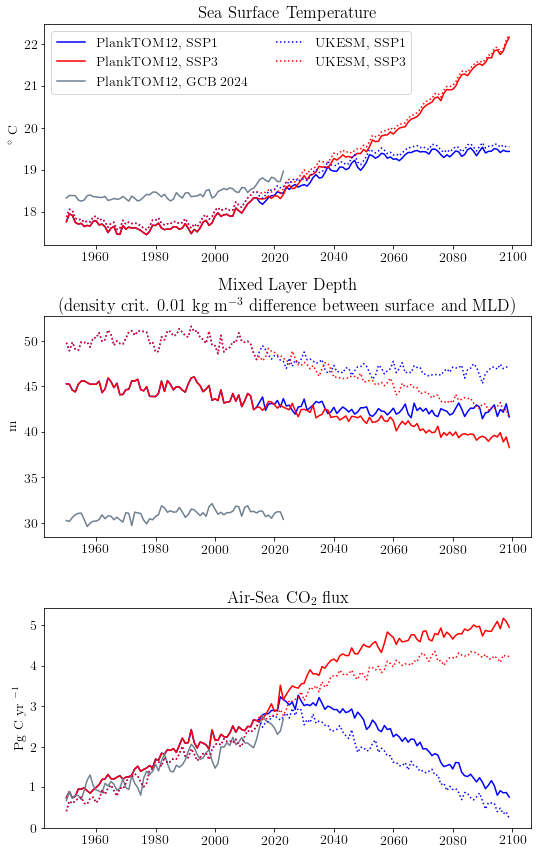

In [122]:
fact = 1.1
fig, axs = plt.subplots(3,1, figsize=(7*fact, 11*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()


tdat = 'Cflx'

def plotme(tdat,ind,Acol = 'b', Bcol = 'r', Gcol = 'slategrey', ukesmlin = ':', tomlin = '-', gcblin = '--'):
    tomA = xr.open_dataset(f'./data/FG_{tdat}_tom_1AA7.nc')
    tomAd = tomA[tdat].groupby('time_counter.year').mean()
    tomB = xr.open_dataset(f'./data/FG_{tdat}_tom_1BA7.nc')
    tomBd = tomB[tdat].groupby('time_counter.year').mean()
    
    tomG = xr.open_dataset(f'./data/FG_{tdat}_tom_R4A0.nc')
    tomGd = tomG[tdat].groupby('time_counter.year').mean()
    
    ukesmA = xr.open_dataset(f'./data/FG_{tdat}_ukesm_1A.nc')
    ukesmAd = ukesmA[tdat].groupby('time_counter.year').mean()
    ukesmB = xr.open_dataset(f'./data/FG_{tdat}_ukesm_1B.nc')
    ukesmBd = ukesmB[tdat].groupby('time_counter.year').mean()
    
    axs[ind].plot(tomAd.year,tomAd, color = Acol, linestyle = tomlin, label = 'PlankTOM12, SSP1')
    axs[ind].plot(tomBd.year,tomBd, color = Bcol, linestyle = tomlin, label = 'PlankTOM12, SSP3')
    axs[ind].plot(tomGd.year,tomGd, color = Gcol, linestyle = tomlin, label = 'PlankTOM12, GCB 2024')
    axs[ind].plot(ukesmAd.year,ukesmAd, color = Acol, linestyle = ukesmlin, label = 'UKESM, SSP1')
    axs[ind].plot(ukesmBd.year,ukesmBd, color = Bcol, linestyle = ukesmlin, label = 'UKESM, SSP3')
    
    if ind == 0:
        axs[ind].legend(loc = 'best', ncol = 2)

plotme('thetao',0)
plotme('somxl010',1)        
plotme('Cflx',2)#,ind

axs[0].set_ylabel('$^{\circ}$ C')
axs[1].set_ylabel('m')
axs[2].set_ylabel('Pg C yr $^{-1}$')

axs[0].set_title('Sea Surface Temperature')
axs[1].set_title('Mixed Layer Depth \n (density crit. 0.01 kg m$^{-3}$ difference between surface and MLD)')
axs[2].set_title('Air-Sea CO$_2$ flux')

plt.tight_layout()